In [1]:
import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:
import os
import pandas as pd
import torch
import torch.nn as nn
import umap
from model import DeepTensorFactorization
from utils import get_cell_type_compound_gene
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import umap.plot

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [4]:
# Setup model
cell_types, compounds, genes = get_cell_type_compound_gene()
    
model = DeepTensorFactorization(cell_types=cell_types,
                                compounds=compounds,
                                genes=genes)

In [5]:
state_dict = torch.load('/data/pinello/PROJECTS/2023_08_ZL/kaggle_scp/model/deep_tf_v2/model.pth')
model.load_state_dict(state_dict['state_dict'])

<All keys matched successfully>

In [6]:
cell_type_embedding = model.get_cell_type_embedding
compound_embedding = model.get_compound_embedding
gene_embedding = model.get_gene_embedding

<Axes: xlabel='PC1', ylabel='PC2'>

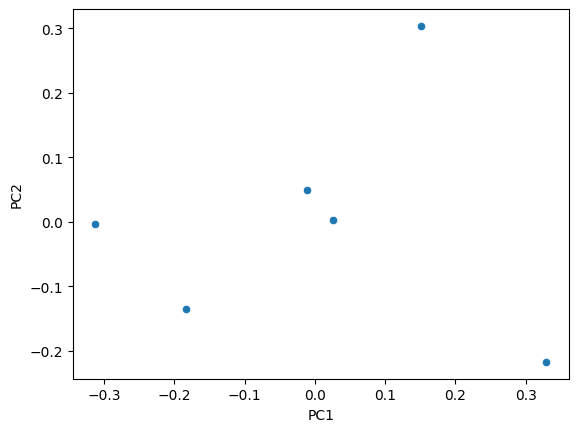

In [7]:
# viz cell type embeddings
pca = PCA(n_components=2)
embedding = pca.fit_transform(cell_type_embedding)
df = pd.DataFrame(embedding, index=cell_types, columns=['PC1', 'PC2'])
sns.scatterplot(df, x='PC1', y='PC2')

<Axes: >

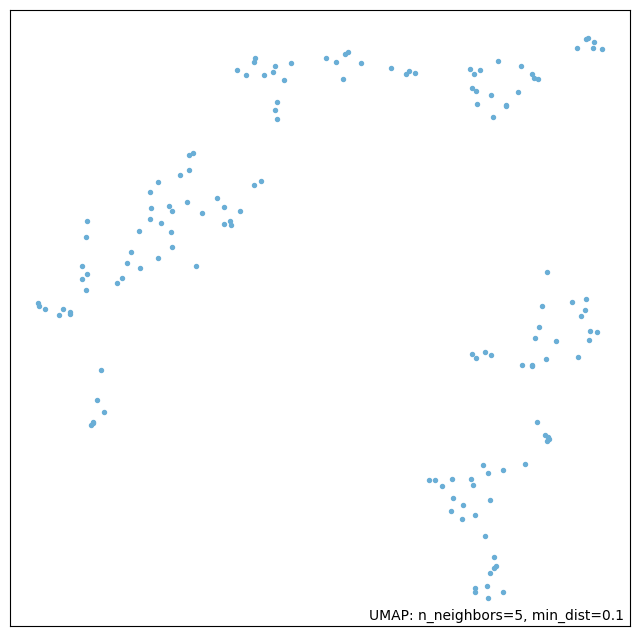

In [8]:
embedding = umap.UMAP(n_neighbors=5).fit(compound_embedding)
umap.plot.points(embedding)

<Axes: >

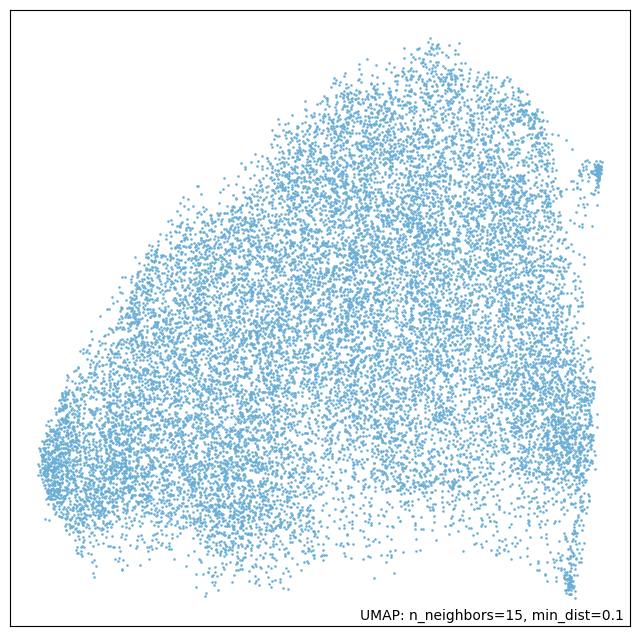

In [9]:
embedding = umap.UMAP(n_neighbors=15).fit(gene_embedding)
umap.plot.points(embedding)